# Question D14

*Question*: What are the main purposes of the ML-enabled system projects in which you participated?

*Answer Type*: Multiple Option and Free Field

*Options*: [Prediction, Classification, Association, Clustering, Others please specify]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values, format_wordcloud_text
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In [3]:
# question options
purposes = {
    'D14_ML_Purpose_Prediction': 'Prediction',
    'D14_ML_Purpose_Classification': 'Classification',
    'D14_ML_Purpose_Association': 'Association',
    'D14_ML_Purpose_Clustering': 'Clustering',
    'D14_ML_Purpose_Others': 'Others'
}

### Basic Analysis

In [4]:
dataframe_obj.df[['D14_ML_Purpose_Prediction', 'D14_ML_Purpose_Classification', 'D14_ML_Purpose_Association',
    'D14_ML_Purpose_Clustering', 'D14_ML_Purpose_Others']].head()

,D14_ML_Purpose_Prediction,D14_ML_Purpose_Classification,D14_ML_Purpose_Association,D14_ML_Purpose_Clustering,D14_ML_Purpose_Others
0,quoted,not quoted,not quoted,not quoted,not quoted
1,not quoted,quoted,not quoted,not quoted,not quoted
2,quoted,quoted,not quoted,quoted,not quoted
3,not quoted,quoted,not quoted,quoted,not quoted
4,quoted,quoted,not quoted,quoted,quoted


In [5]:
indexes = []
values = []
chart_positions = []
for purpose in purposes:
    indexes.append(purposes[purpose])
    values.append(dataframe_obj.df[purpose].value_counts()['quoted'])
    chart_positions.append(1 if 'Others' not in purpose else 0)

In [6]:
# compute total of unique answers in this question
total = 0
for idx, row in dataframe_obj.df.iterrows():

    if row['D14_ML_Purpose_Prediction'] == 'quoted' or row['D14_ML_Purpose_Classification'] == 'quoted' or row['D14_ML_Purpose_Association'] == 'quoted' or row['D14_ML_Purpose_Clustering'] == 'quoted' or row['D14_ML_Purpose_Others'] == 'quoted':
        total += 1

total_answers = 'N = ' + str(total)

In [7]:
# plot object
d14_plot = PlotUtils(pd.DataFrame(
    data={'Purpose': indexes, 'Answers': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Answers'], ascending=False))

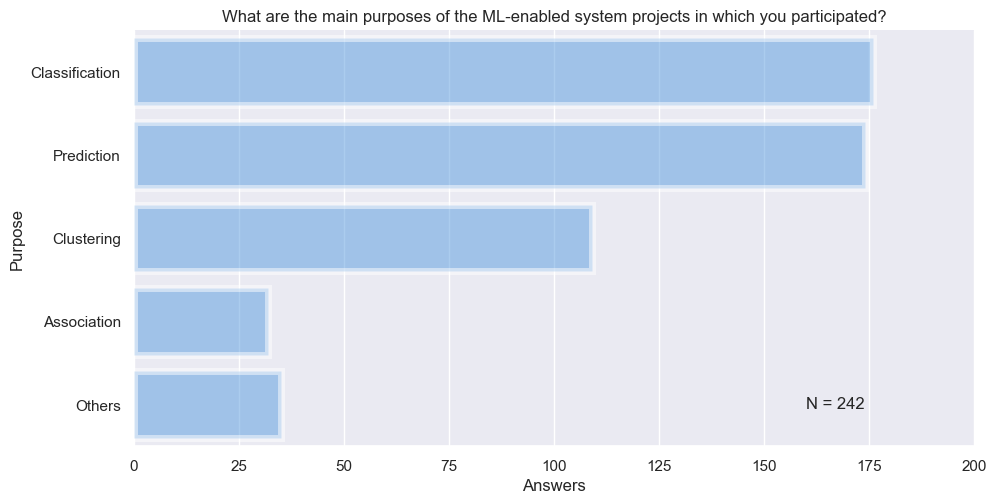

In [8]:
d14_plot.single_barplot(x_axis="Answers", y_axis="Purpose",
                       title="What are the main purposes of the ML-enabled system projects in which you participated?",
                       x_label="Answers", y_label="Purpose", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

#### WordCloud

In [9]:
# remove unnecessary values
purpose_free = list(filter(lambda a: str(a) != '-99', 
                           list(dataframe_obj.df['D14_ML_Purpose_Others_Free'])))
purpose_free = list(filter(lambda a: str(a) != 'nan', purpose_free))

In [10]:
purpose_words = format_wordcloud_text(texts=purpose_free, use_sep=True)

In [11]:
# plot object
d14_wc_plot = PlotUtils(pd.DataFrame(
    data={'Word': list(purpose_words.keys()), 'Weight': list(purpose_words.values())}
))

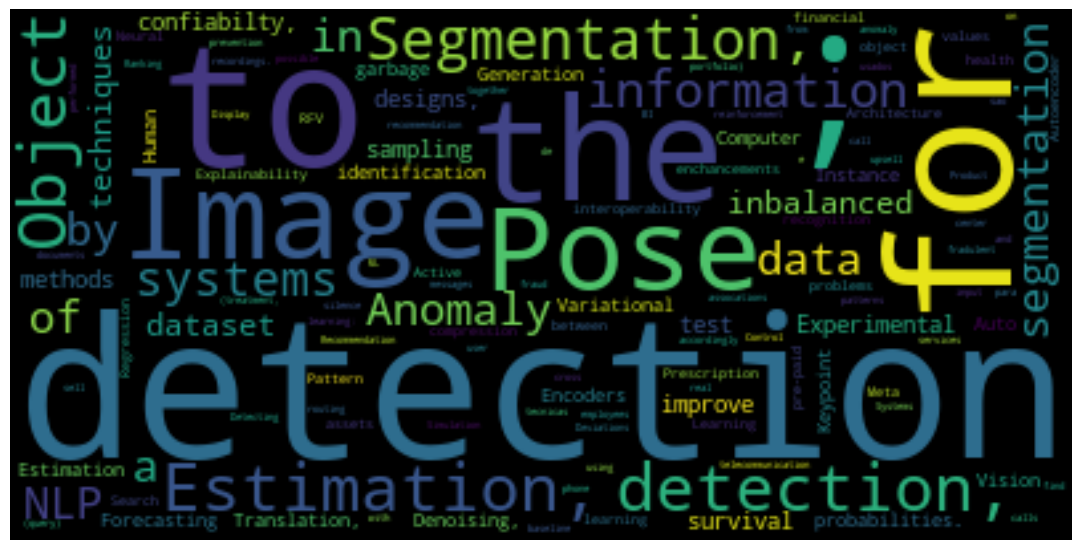

In [12]:
d14_wc_plot.wordcloud("Word", 'Weight')

### Bootstrapping Analysis

In [13]:
prefix = "D14_ML_Purpose_"

In [14]:
# the possible answers are the ones in columns
valid_options_list = [purpose_column.split(prefix)[1] for purpose_column in purposes]

In [15]:
# answers could be composed by more than one option, so we will have an array of selected options
valid_answers_list = []
for idx, row in dataframe_obj.df.iterrows():
    answer = []
    for option in valid_options_list:
        if row[prefix + option] == 'quoted':
            answer.append(option)
    
    # if answer is empty, we assume that 'Others' was assigned - in terms of meaning 'Other context not listed'
#     if not answer:
#         answer = ['Others']
    valid_answers_list.append(answer)

In [16]:
bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, 1000, 100, 95)

In [17]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping(question_type="multiple")

In [18]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
chart_positions = []
for idx in bootstrapped_dict_data:
    indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    values += bootstrapped_dict_data[idx]['population']
    chart_positions += [1 if 'Others' not in idx else 0 for _ in range(len(bootstrapped_dict_data[idx]['population']))]

In [19]:
# plot object for bootstrapped data
d14_boot_plot = PlotUtils(pd.DataFrame(
    data={'Purpose': indexes, 'Value': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Value'], ascending=False))

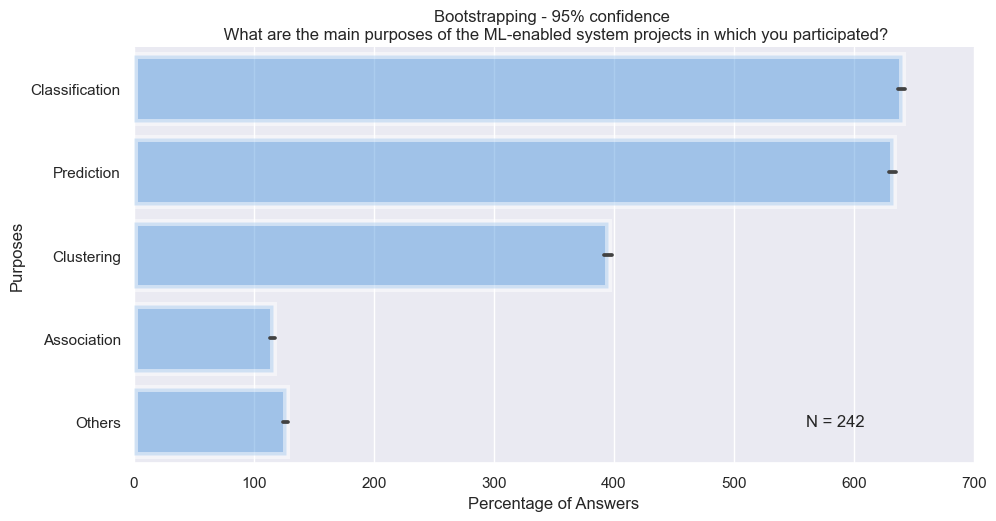

In [20]:
d14_boot_plot.single_barplot(x_axis="Value", y_axis="Purpose", 
                       title="Bootstrapping - 95% confidence \n What are the main purposes of the ML-enabled system projects in which you participated?",
                       x_label="Percentage of Answers", y_label="Purposes", x_label_rotation=0, color="#429bf5",
                       total_answers=total_answers)

In [21]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

Option: (Lower Value, Mean, Upper Value)
Prediction:(628.9241907964, 632.18, 635.4358092035999)
Classification:(636.6694180664442, 639.77, 642.8705819335557)
Association:(113.4379157487603, 115.57, 117.70208425123968)
Clustering:(391.52874243578356, 394.83, 398.1312575642164)
Others:(124.57537134770394, 126.65, 128.72462865229608)
